In [6]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from scipy import stats
import matplotlib.pyplot as plt

from src.reactions.e2_sn2.e2_sn2_dataset import XtbSimulatedE2Sn2Dataset
from src.reactions.e2_sn2.e2_sn2_dataset import E2Sn2Dataset

In [2]:
dataset = XtbSimulatedE2Sn2Dataset(
    csv_file_path="xtb_simulated_sn2.csv"
)

df = dataset.load(
    aggregation_mode='avg',
    mode='regression',
    margin=3 / 627.5
)

/home/ruard/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ruard/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
targets, preds = [], []
for idx in df['reaction_idx'].unique():
    target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
    pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']
    
    if len(pred) > 0 and len(target) > 0:
        targets.append(target.values[0])
        preds.append(pred.values[0])

[0.01742767] [0.00354276]
[0.06385463] [-8.13419e-07]
[0.03670288] [-0.00598431]
[0.00474849] [-0.00285253]
[0.02421618] [0.00160966]
[0.03050745] [-4.6493463e-05]
[0.04944431] []
[0.04519801] [-0.00808826]
[0.08154741] [0.00276079]
[0.09060844] [0.01021637]
[0.07495262] [0.00558728]
[0.05568331] [0.01619719]
[0.05349216] [0.00664801]
[0.00833116] [-0.03339077]
[0.04409807] []
[0.04629121] [0.00332395]
[-0.00409611] [-0.03986866]
[0.07340413] [0.02860632]
[0.06396381] [0.01650594]
[0.03734245] [-0.02071565]
[0.0257952] [-0.00100685]
[0.07005499] [0.01007591]
[0.06036885] [0.00016066]
[0.04585976] [0.0040936]
[0.03533378] [-8.14301165e-05]
[0.0347743] [-0.00291929]
[0.05605493] [0.0139573]
[0.04848974] [0.00817264]
[0.09670424] [0.00356446]
[0.05378867] [3.18259e-06]
[0.0067498] [-0.01027856]
[0.02771093] [-0.03457518]
[0.03987833] [3.09768334e-07]
[0.06209247] [0.01936584]
[0.02862404] [0.00778693]
[0.03258664] [-0.00578702]
[0.01265362] [1.87080014e-06]
[0.04076655] [0.00068199]
[0.02

PearsonRResult(statistic=0.48757789341029956, pvalue=2.149963178545674e-20)


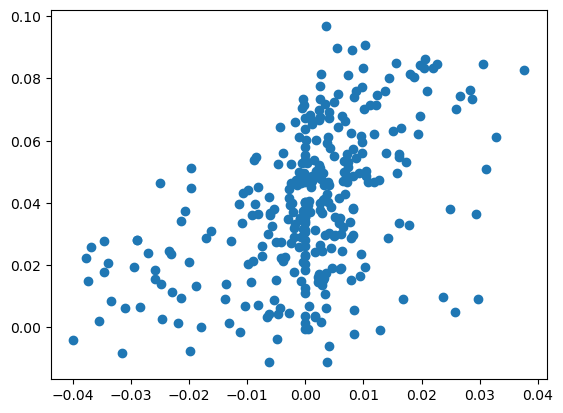

In [9]:
print(stats.pearsonr(preds, targets))

plt.scatter(preds, targets)